In [1]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score
from sys import getsizeof

**Helper Functions**

In [2]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [3]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

**Import Fashion MNIST dataset**
Dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:
![Fashion MNIST dataset](img/Fashion MNIST dataset.png)

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 1s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Explore the data**

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Test dataset**

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

**Preprocessing**

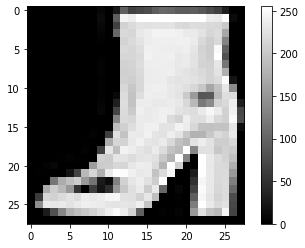

In [11]:
plt.figure()
plt.imshow(train_images[88], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

**Build & Compile the model**

In [13]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

2021-11-07 11:49:10.711514: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 859us/step - loss: 0.5014 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 2s 840us/step - loss: 0.3737 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 2s 836us/step - loss: 0.3342 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 2s 852us/step - loss: 0.3117 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 2s 856us/step - loss: 0.2945 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 2s 833us/step - loss: 0.2801 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 2s 831us/step - loss: 0.2684 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 2s 858us/step - loss: 0.2572 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 2s 952us/step - loss: 0.2475 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 2s 874u

In [17]:
KERAS_MODEL_NAME = "tf_model_fashion_mnist.h5"
model.save(KERAS_MODEL_NAME)

In [18]:
convert_bytes(get_file_size(KERAS_MODEL_NAME), "MB")

File size: 1.191 Megabytes


In [19]:
keras_model_size = get_file_size(KERAS_MODEL_NAME)

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy is {}%'.format(round(100*test_acc, 2)))

313/313 - 0s - loss: 0.3329 - accuracy: 0.8841 - 273ms/epoch - 872us/step

Test accuracy is 88.41%


**TensorFlow Lite model**

In [21]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)


2021-11-07 16:17:57.805463: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmpofkcn1ha/assets


2021-11-07 16:17:58.477228: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2021-11-07 16:17:58.477244: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2021-11-07 16:17:58.479216: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmpofkcn1ha
2021-11-07 16:17:58.482090: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2021-11-07 16:17:58.482112: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmpofkcn1ha
2021-11-07 16:17:58.488044: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2021-11-07 16:17:58.537751: I tensorflow/cc/saved_model/loader.cc:194] Running initialization op on SavedModel bundle at path: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmpofkcn1ha
2021-11

408632

In [22]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

File size: 399.055 Kilobytes


In [23]:
tflite_file_size = get_file_size(TF_LITE_MODEL_FILE_NAME)

**Check input Tensor shape**

In [24]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 28 28]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


**Resize Tensor shape**

In [25]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [10000    28    28]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


In [26]:
test_images.dtype

dtype('float64')

In [27]:
test_imgs_numpy = np.array(test_images, dtype=np.float32)
test_imgs_numpy.dtype

dtype('float32')

In [29]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape: (10000, 10)


In [30]:
acc = accuracy_score(prediction_classes, test_labels)
print('Test accuracy TFLITE model is {}%'.format(round(100*acc, 2)))

Test accuracy TFLITE model is 88.41%


In [31]:
tflite_file_size/keras_model_size

0.3272952122206274

**TensorFlow Lite model Float 16**

In [32]:
TF_LITE_MODEL_FLOAT_16_FILE_NAME = "tf_lite_float_16_model.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
tf_lite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmp465_3ras/assets


INFO:tensorflow:Assets written to: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmp465_3ras/assets
2021-11-07 16:28:27.171726: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2021-11-07 16:28:27.171740: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2021-11-07 16:28:27.171847: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmp465_3ras
2021-11-07 16:28:27.173029: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2021-11-07 16:28:27.173043: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmp465_3ras
2021-11-07 16:28:27.177742: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2021-11-07 16:28:27.218067: I tensorflow/cc/saved_model/loader.cc:194] Running initializatio

In [33]:
tflite_model_name = TF_LITE_MODEL_FLOAT_16_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

205696

In [34]:
convert_bytes(get_file_size(TF_LITE_MODEL_FLOAT_16_FILE_NAME), "KB")

File size: 200.875 Kilobytes


In [35]:
tflite_float_16_file_size = get_file_size(TF_LITE_MODEL_FLOAT_16_FILE_NAME)
tflite_float_16_file_size/keras_model_size
tflite_float_16_file_size/tflite_file_size

0.5033771217134243